<a href="https://colab.research.google.com/github/BartekFranczak/CPO---MEL/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 

uploaded = files.upload()

Saving lab03.zip to lab03.zip


In [2]:
from zipfile import ZipFile

file_name = '/content/lab03.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()



In [3]:
import os
from os import path
if path.exists('/content/results')==False:
  os.mkdir('/content/results')

In [4]:
from os import listdir 
from os.path import join

path = '/content'

path_sp = join(path,'sp')
path_ga = join(path,'ga')
path_gray = join(path,"gray")

list_sp = [join(path_sp, p) for p in listdir(path_sp)]
list_ga = [join(path_ga, p) for p in listdir(path_ga)]
list_gray = [join(path_gray, p) for p in listdir(path_gray)]

import random 
def pick_random_files(ls1,ls2,ls3, n):
  numbers = random.sample(range(0,len(ls1)),n)
  l1 = [ls1[n] for n in numbers]
  l2 = [ls2[n] for n in numbers]
  l3 = [ls3[n] for n in numbers]
  return l1+l2+l3

file_paths = pick_random_files(list_gray, list_sp, list_ga, 2)
print(file_paths)

['/content/gray/2.jpg', '/content/gray/4.jpg', '/content/sp/2.jpg', '/content/sp/4.jpg', '/content/ga/2.jpg', '/content/ga/4.jpg']


# Zadanie 1 Poprawa jakości obrazu


1.   Rozciąganie histogramu
2.    Wyrównywanie histogramu


In [5]:
from PIL import Image
import numpy as np 

In [6]:
def histogram_streaching(im_path):
  im = Image.open(im_path)
  im = np.asarray(im)
  min_val = np.min(im)
  max_val = np.max(im)
  im = (im -min_val)/(max_val-min_val)*255
  return im

def histogram_equalization(im_path):
  im = Image.open(im_path)
  im = np.asarray(im)
  unique_val = np.unique(im, return_counts=True)
  im_size = im.size
  values = unique_val[0]
  counts = unique_val[1]
  p = counts/im_size
  c = np.zeros(p.shape)
  for i in range(p.size):
    c[i] = np.sum(p[:(i+1)])
  
  c_min = np.min(c)
  
  im_eq = np.zeros(im.shape)

  H,W= im.shape

  for h in range(H):
    for w in range(W):
      val = im[h][w]
      idx = np.where(values==val)
      idx = np.sum(idx)
      im_eq[h][w]= np.round(((c[idx]-c_min)/(1-c_min))*(values.size-1))
  return im_eq


(array([[25.,  8.,  1., ..., 59.,  1.,  9.],
        [28.,  2.,  0., ..., 66.,  1., 11.],
        [29.,  4.,  2., ..., 65.,  3.,  7.],
        ...,
        [44., 71., 40., ...,  4.,  2.,  7.],
        [63., 64., 37., ...,  5.,  0., 15.],
        [34., 86., 45., ...,  7.,  4.,  2.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

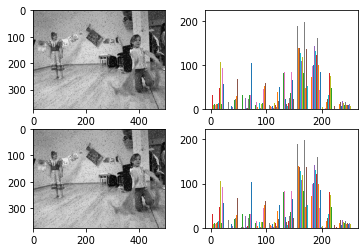

In [16]:
from cv2 import equalizeHist, normalize
import matplotlib.pyplot as plt

plt.figure()
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)
im1 = histogram_streaching('/content/sp/5.jpg')
plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.hist(im)
plt.subplot(2,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(2,2,4)
plt.hist(im1)



(array([[ 34.,   6.,  70., ...,  34.,  15.,  10.],
        [ 30.,   5.,  72., ...,  29.,  17.,  12.],
        [ 33.,   8.,  70., ...,  28.,  17.,  10.],
        ...,
        [126.,  68.,  81., ...,   1.,   2.,  10.],
        [137.,  61.,  67., ...,   2.,   3.,  15.],
        [135.,  62.,  79., ...,   3.,   1.,   6.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

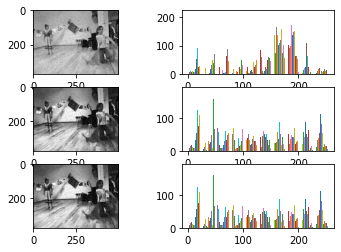

In [8]:
from cv2 import equalizeHist

plt.figure()
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)
im1 = histogram_equalization('/content/sp/5.jpg')

im_eq_cv = equalizeHist(im)

plt.subplot(3,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(3,2,2)
plt.hist(im)
plt.subplot(3,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(3,2,4)
plt.hist(im1)
plt.subplot(3,2,5)
plt.imshow(im_eq_cv, cmap='gray')
plt.subplot(3,2,6)
plt.hist(im_eq_cv)

# Zadanie 2 Filtrowanie 





1.   średniej arytmetycznej 3x3, 5x5
2.   filtr gaussa
3.   filtr medianowy



In [10]:
def mean_filter(im_path, size):
  im = Image.open(im_path)
  im = np.asarray(im)
  n = int((size-1)/2)
  
  H, W = im.shape
  
  im2 = np.zeros(im.shape)
  kernel = np.ones((size,size),np.float32)/(size*size)
 
  for h in range(n,H-n):
    for w in range(n,W-n):
      im2[h][w] = np.sum(im[h-n:h+n+1,w-n:w+n+1]*kernel)
  return im2[n:H-n,n:W-n]

(array([[16.,  3.,  1., ..., 73.,  1.,  0.],
        [16.,  4.,  1., ..., 66.,  1.,  0.],
        [18.,  2.,  1., ..., 79.,  2.,  0.],
        ...,
        [29., 57., 49., ...,  6.,  2.,  0.],
        [26., 72., 58., ...,  2.,  3.,  1.],
        [48., 60., 37., ...,  3.,  4.,  1.]]),
 array([  2.,  27.,  52.,  77., 102., 127., 152., 177., 202., 227., 252.]),
 <a list of 500 BarContainer objects>)

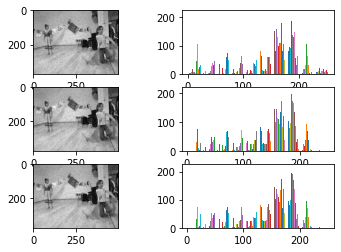

In [11]:
from cv2 import filter2D
plt.figure()

#oryginal
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)


plt.subplot(3,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(3,2,2)
plt.hist(im)


# my implementation
im1 = mean_filter('/content/sp/5.jpg',3)

plt.subplot(3,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(3,2,4)
plt.hist(im1)

#cv2
kernel = np.ones((3,3),np.float32)/9
img_filter3 = filter2D(im,-1,kernel)

plt.subplot(3,2,5)
plt.imshow(img_filter3, cmap='gray')
plt.subplot(3,2,6)
plt.hist(img_filter3)

Filtr Gaussa

In [31]:
import math 
def gauss_filter_5(im_path,sigma):
  im = Image.open(im_path)
  im = np.asarray(im)
  size=5
  n = int((size-1)/2)
  
  H, W = im.shape
  
  im2 = np.zeros(im.shape)
  d = np.array([[math.sqrt(8),math.sqrt(5),2,math.sqrt(5),math.sqrt(8)],
                    [math.sqrt(5),math.sqrt(2),1,math.sqrt(2),math.sqrt(5)],
                    [2,1,0,1,2],
                    [math.sqrt(5),math.sqrt(2),1,math.sqrt(2),math.sqrt(5)],
                    [math.sqrt(8),math.sqrt(5),2,math.sqrt(5),math.sqrt(8)]])
  
  kernel=(1/(2*math.pi*sigma*sigma))*np.exp(d*d/(2*sigma*sigma)*(-1))
 
  for h in range(n,H-n):
    for w in range(n,W-n):
      distance = np.sum(im[h-n:h+n+1,w-n:w+n+1]*d)
      im2[h][w] = np.sum(im[h-n:h+n+1,w-n:w+n+1]*kernel)
  return im2[n:H-n,n:W-n]




(array([[25.,  8.,  1., ..., 59.,  1.,  9.],
        [28.,  2.,  0., ..., 66.,  1., 11.],
        [29.,  4.,  2., ..., 65.,  3.,  7.],
        ...,
        [44., 71., 40., ...,  4.,  2.,  7.],
        [63., 64., 37., ...,  5.,  0., 15.],
        [34., 86., 45., ...,  7.,  4.,  2.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

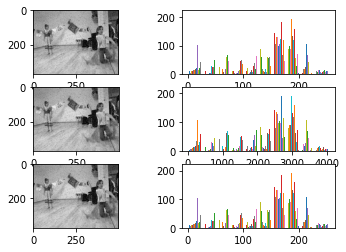

In [32]:
from cv2 import GaussianBlur

#oryginal
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)

plt.subplot(3,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(3,2,2)
plt.hist(im)


#my implementation
im1 = gauss_filter_5('/content/sp/5.jpg',0.1)

plt.subplot(3,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(3,2,4)
plt.hist(im1)

#cv2
img_filter3 = GaussianBlur(im,(5,5),0.1)


plt.subplot(3,2,5)
plt.imshow(img_filter3, cmap='gray')
plt.subplot(3,2,6)
plt.hist(img_filter3)

Filtr Medianowy

In [14]:
def median_filter(im_path, size):
  im = Image.open(im_path)
  im = np.asarray(im)
  n = int((size-1)/2)
  
  H, W = im.shape
  
  im2 = np.zeros(im.shape)
  
 
  for h in range(n,H-n):
    for w in range(n,W-n):
      crop = im[h-n:h+n+1,w-n:w+n+1]
      median = int(np.median(crop))
      im2[h][w] = median
  return im2[n:H-n,n:W-n]

(array([[19.,  4.,  1., ..., 70.,  0.,  0.],
        [19.,  4.,  1., ..., 70.,  0.,  0.],
        [19.,  3.,  1., ..., 74.,  0.,  0.],
        ...,
        [28., 81., 38., ...,  3.,  2.,  0.],
        [34., 85., 44., ...,  4.,  1.,  2.],
        [33., 86., 46., ...,  5.,  2.,  2.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

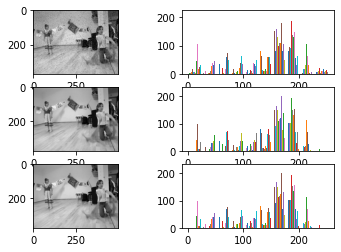

In [15]:
from cv2 import medianBlur
plt.figure()

#oryginal
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)


plt.subplot(3,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(3,2,2)
plt.hist(im)


# my implementation
im1 = median_filter('/content/sp/5.jpg',3)

plt.subplot(3,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(3,2,4)
plt.hist(im1)

#cv2

img_filter3 = medianBlur(im,3)

plt.subplot(3,2,5)
plt.imshow(img_filter3, cmap='gray')
plt.subplot(3,2,6)
plt.hist(img_filter3)

# ZAD3 Porównanie prędkości

In [37]:
import time

#zaiplemenowane przeze mnie funkcje ładują obraz wewnątrz funkcji. 
# aby porównać prędkość działania należy odjąć wartość ładowania obrazu,
#od czasu działania funkcji 
time0 = time.time()
im = Image.open('/content/sp/5.jpg')
np_im = np.asarray(im)
time1 = time.time()

t_loade_im = time1 -time0

t1 = time.time()
im2 = histogram_streaching('/content/sp/5.jpg')
t2 = time.time()
im3 = histogram_equalization('/content/sp/5.jpg')
t3 = time.time()
im4 = equalizeHist(np_im)
t4 = time.time()
im5 = mean_filter('/content/sp/5.jpg',3)
t5 = time.time()
kernel = np.ones((3,3),np.float32)/9
im6 = filter2D(np_im,-1,kernel)
t6 = time.time()
im5 = mean_filter('/content/sp/5.jpg',5)
t7 = time.time()
kernel = np.ones((5,5),np.float32)/25
im6 = filter2D(np_im,-1,kernel)
t8 = time.time()
im7 = median_filter('/content/sp/5.jpg',3)
t9 = time.time()
img_filter3 = medianBlur(np_im,3)
t10 = time.time()
im8 = gauss_filter_5('/content/sp/5.jpg',0.1)
t11 = time.time()
im9 = GaussianBlur(np_im,(5,5),0.1)
t12 = time.time()


print("Rozciąganie histogramu:",t2-t1)
print("Wyrównywanie histogramu:",t3-t2-t_loade_im)
print("cv2 - Wyrównywanie histogramu:",t4-t3)
print("Filtr uśredniejący 3x3:",t5-t4-t_loade_im)
print("cv2 - Filtr uśredniejący 3x3:",t6-t5)
print("Filtr uśredniający 5x5:",t7-t6-t_loade_im)
print("cv2 - Filtr uśredniający 5x5:",t8-t7)
print("Filtr gaussa 5x5:",t11-t10-t_loade_im)
print("cv2 - Filtr gaussa 5x5:",t12-t9)
print("Filtr medianowy:",t9-t8-t_loade_im)
print("cv2 - Filtr medianowy:",t10-t9)

Rozciąganie histogramu: 0.005935192108154297
Wyrównywanie histogramu: 4.707147836685181
cv2 - Wyrównywanie histogramu: 0.00072479248046875
Filtr uśredniejący 3x3: 2.4255707263946533
cv2 - Filtr uśredniejący 3x3: 0.0009095668792724609
Filtr uśredniający 5x5: 2.556034803390503
cv2 - Filtr uśredniający 5x5: 0.0015130043029785156
Filtr gaussa 5x5: 2.5617659091949463
cv2 - Filtr gaussa 5x5: 2.5683538913726807
Filtr medianowy: 4.355926275253296
cv2 - Filtr medianowy: 0.0006048679351806641
